## Demonstration of DEM Download ##

This notebook provides simple examples of how to search for, download, and merge geospatial data products from The National Map (TNM).

In [77]:
import os
import sys

sys.path.append('..') #path to the script we need (the dem_getter directory)
from dem_getter import dem_getter as dg #repository for functions to request/download/merge geospatial data from TNM

Each function described below requires the user to input the name of the dataset they are interested in, and returns a list of paths where that data can be downloaded. There are several datasets available:

In [78]:
print('Available datasets are: {}'.format(list(dg.DATASETS_DICT.keys())))

Available datasets are: ['DEM_1m', 'DEM_5m', 'NED_1-9as', 'NED_1-3as', 'NED_1as', 'NED_2as', 'LPC', 'OPR']


More information about the available datasets can be found at https://www.usgs.gov/3d-elevation-program/about-3dep-products-services. A map showing product coverage is available at https://apps.nationalmap.gov/lidar-explorer/#/.

### Search Options ###

There are several functions available depending on how the user wants to limit their search. The search options are:
* **Bounding box [x_min, y_min, x_max, y_max]** 
    * Geographic longitude/latitude values expressed in decimal degrees in a comma-delimited list
* **Polygon** 
    * A list of x,y coordinates describing a polygon
* **Geodataframe** 
    * A dataframe containing a geometry column
* **24k Quad Name**
    * Name of a valid USGS 7.5'' quadrangle map. Information about available quad names can be found at:  
     https://www.usgs.gov/faqs/where-can-i-find-indexes-usgs-topographic-maps


### Function Defaults ###

When inputting coordinates for a bounding box, the default setting... though the user may specify a different CRS
The default coordinate system for the search option inputs is WGS84:

In [79]:
print("The default EPSG code for the input coordinate system is: "+str(dg.EXPECTED_EPSG))

The default EPSG code for the input coordinate system is: 4326


Additionally, each search is limited by a maximum number of products to be returned:

In [80]:
print("The maximum number of products returned is: "+ str(dg.MAXITEMS))

The maximum number of products returned is: 500


Some searches return multiple products within the same spatial extent; the default setting for the parameter do_exclude_redundant_data returns only the most current version of the data.

### Optional Inputs ###

Users can input a file name where the list of download paths can be saved, which the function will create if it doesn't already exist. By default, the code returns these paths as a list. 

In [81]:
saveDlPaths=os.path.join('..','test_data','test_dlPaths.txt')

The user can also specify the type of data they want returned. Different resolutions of data have the following options available:  

**STANDARD DEMS**  

* 1 meter DEM - GeoTIFF, IMG                 
    `Dataset code: 'DEM_1m'`
* 5 meter DEM (Alaska only) - Varies         
    `Dataset code: 'DEM_5m'`
* NED 1/9 arc-second (3 m) - IMG             
    `Dataset code: 'NED_1-9as'`
* NED 1/3 arc-second (10 m) - GeoTIFF        
    `Dataset code: 'NED_1-3as'`
* NED 1 arc-second (30 m) – GeoTIFF         
     `Dataset code: 'NED_1as'`
* NED 2 arc-second (Alaska – 60 m) - GeoTIFF   
     `Dataset code: 'NED_2as'`  

**SOURCE DATA PRODUCTS**  
  
* Lidar Point Cloud (LPC) – LAS, LAZ         
     `Dataset code: 'LPC'`  
* Original Product Resolution (OPR) - Varies  
     `Dataset code: 'OPR'` 

### Example Product Queries: Bounding Box ###

In [82]:
#find all the DEM 1-meter products in GeoTIFF format within an arbitrary bounding box
dl_list=dg.get_aws_paths(dataset='DEM_1m',xMin=-104,yMin=40,xMax=-101,yMax=41, filePath=saveDlPaths, dataType='GeoTIFF', doExcludeRedundantData=True)

562 products are available; 500 have been fetched.


If the user entered a path for the output to be saved, the generated file will look like this:

<img src=../images/savedAwsPathsExample.PNG width='900'>

The function will also return the fetched path as a list:

In [83]:
#find all the NED 1/3 arc-second products in any format within Colorado
dl_list=dg.get_aws_paths('NED_1-3as',-109,37,-102,41)
print(dl_list[:5])

['https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n37w102/USGS_13_n37w102_20210623.tif', 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n37w103/USGS_13_n37w103_20210630.tif', 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n37w104/USGS_13_n37w104_20210630.tif', 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n37w105/USGS_13_n37w105_20230602.tif', 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n37w106/USGS_13_n37w106_20230602.tif']


If the combination of dataset type and bounding box returns no products, the function will let the user know.

In [84]:
#search that returns no products
dl_list=dg.get_aws_paths('NED_2as',-109,37,-102,41)

No products available API request to: https://tnmaccess.nationalmap.gov/api/v1/products?, with parameters: {'prodFormats': '', 'bbox': '-109,37,-102,41', 'datasets': 'National Elevation Dataset (NED) Alaska 2 arc-second'}


Additionally, the function will halt if the user inputs an incorrect dataset or a datatype that doesn't go with a dataset.

In [85]:
#searching for datasets not included in DATASETS_DICT raises a KeyError
#Here we are just 'catching' the error and printing as a string to avoid showing the full traceback
try:
    dl_list=dg.get_aws_paths('bad_dataset',-109,37,-102,41)
except Exception as e:
    print(str(e))

"Warning, bad_dataset is not available. Available datasets are: ['DEM_1m', 'DEM_5m', 'NED_1-9as', 'NED_1-3as', 'NED_1as', 'NED_2as', 'LPC', 'OPR']"


If searching for LPC products and datatype is specified, it must be LAS or LAZ, or LAS,LAZ.

In [86]:
try:
    dg.get_aws_paths('LPC',-121,35.8,-120.8,36, dataType='GeoTIFF')
except Exception as e:
    print(str(e))

Warning, GeoTIFF is not available. Available datatypes for LPC are LAS, LAZ, or LAS,LAZ


In [87]:
#the same search with the correct data type specified.
dg.get_aws_paths('LPC',-121,35.8,-120.8,36, dataType='LAS,LAZ')

['https://rockyweb.usgs.gov/vdelivery/Datasets/Staged/Elevation/LPC/Projects/legacy/ARRA_CA_CENTRALCOAST_Z4_2010/LAZ/USGS_LPC_ARRA_CA_CENTRALCOAST_Z4_2010_000478.laz',
 'https://rockyweb.usgs.gov/vdelivery/Datasets/Staged/Elevation/LPC/Projects/CA_AZ_FEMA_R9_Lidar_2017_D18/CA_FEMA_Z4_B2_2018/LAZ/USGS_LPC_CA_AZ_FEMA_R9_Lidar_2017_D18_60301885.laz']

These warnings and errors also apply to the path retrieving functions described below.

### Example Product Queries: Polygon and Geodataframe ###

These following examples demonstrate how to easily search for data within a polygon or shapefile.

In [88]:
import geopandas as gpd #use geopandas to read in shapefiles
import matplotlib.pyplot as plt

#Load in a shapefile to use as an example-- Death Valley National Park
dvnp = gpd.read_file(os.path.join('..','test_data','dvnp'))  

<Axes: >

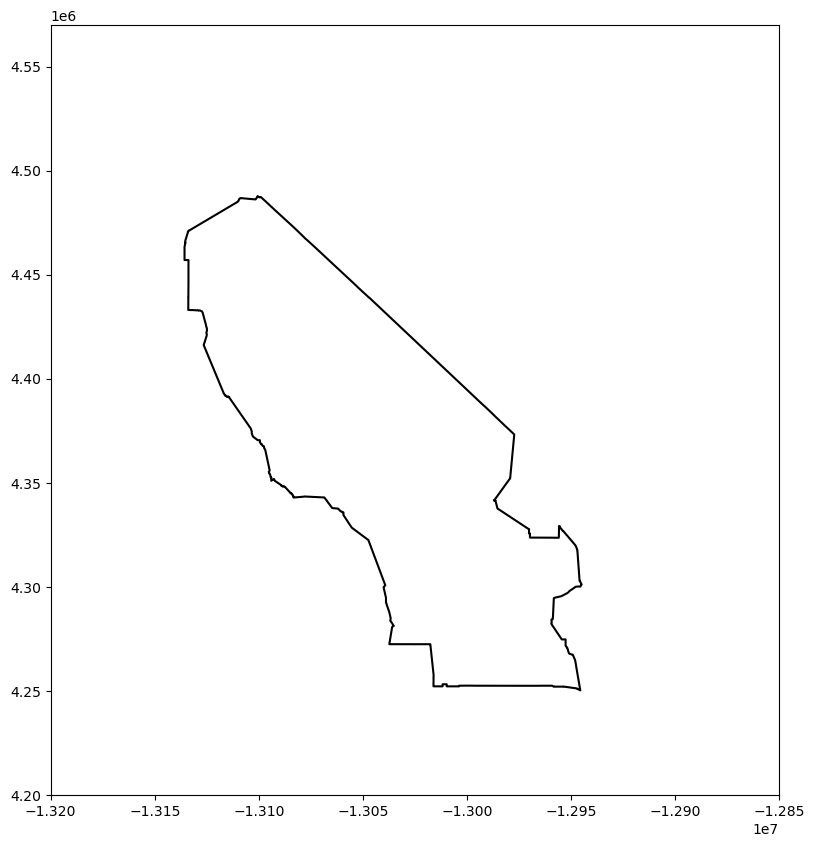

In [89]:
#visualize
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(-1.32e7,-1.285e7)
ax.set_ylim(4.2e6,4.57e6)
dvnp.boundary.plot(ax=ax, color='black')

In [90]:
#find all the NED 1 arc-second products within Death Valley National Park
#by default, the get_aws_paths_from_geodataframe function takes the geometry of the object in the first row of the geodataframe (row_idx=0). 
#Users can set row_idx to consider a different polygon within the geodataframe. 
dl_list=dg.get_aws_paths_from_geodataframe(dataset="NED_1as",gdf=dvnp, rowIdx=0) 

print("Number of products found: "+str(len(dl_list)))

Number of products found: 4


We can also search for products using a polygon to limit the results. The polygon must be expressed as a list of x,y coordinates; we can extract these from the polygon in the Death Valley geodataframe. Using the function get_aws_paths_polygon, we'll get the same results as above.

If you didn't already have these polygons defined you could construct them as lists manually, for example a rectangle between 32 and 32.5 degrees north and 105 and 106 degrees west:

    y = [32, 32.5, 32.5, 32, 32]
    x = [-105, -105, -106, -106, -105]

In [91]:
#get the polygon geometry
geom=dvnp['geometry'][0]
x=[]
y=[]
for idx in geom.exterior.coords:
    x.append(idx[0])
    y.append(idx[1])
x[:5],y[:5] 

([-12970200.45000393,
  -12970185.437051512,
  -12970165.370704006,
  -12970165.015572278,
  -12970165.01233275],
 [4327750.641927647,
  4327750.658929559,
  4327750.68173994,
  4325818.996586877,
  4325800.866292412])

In [92]:
#search for all the DEM 1-meter products using the x,y coordinates
dl_list=dg.get_aws_paths_polygon("NED_1as",x,y,inputEPSG=3857)
print("Number of products found: "+str(len(dl_list)))

Number of products found: 4


#### Multiple Polygons ####

When a geodataframe contains geometry in a multipolygon format, it must be converted to single polygons before using these tools.

In [93]:
#load in multipolygon
frank_church=gpd.read_file('../test_data/frank_church/').to_crs(3857) #Frank Church Wilderness in Idaho
print(frank_church['geometry'])

0    MULTIPOLYGON (((-12898493.919 5690359.521, -12...
1    MULTIPOLYGON (((-12788582.538 5558152.153, -12...
Name: geometry, dtype: geometry


(5450000.0, 5820000.0)

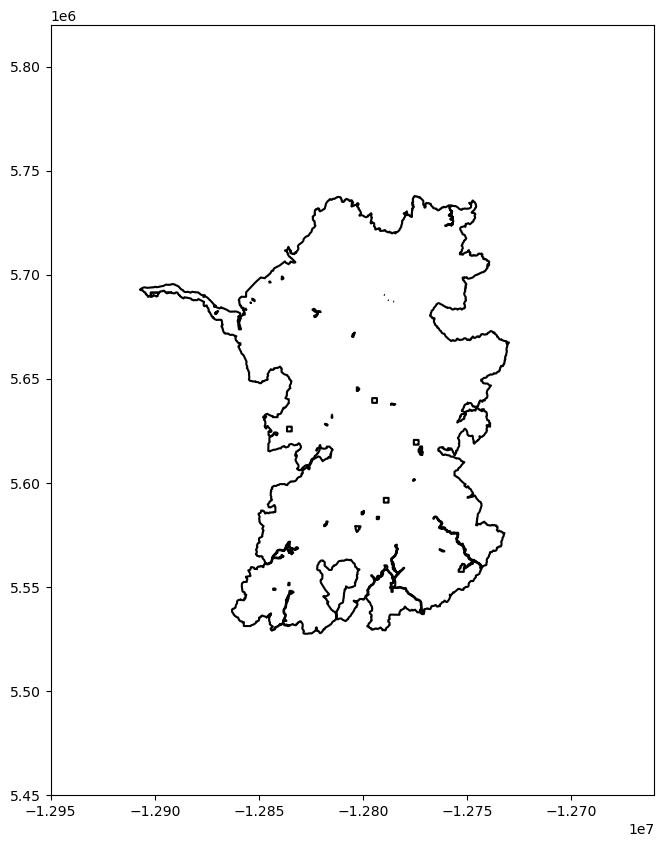

In [94]:
#visualize
ax=frank_church.boundary.plot(color='black',figsize=(10,10))
ax.set_xlim(-1.295e7,-1.266e7)
ax.set_ylim(5.45e6,5.82e6)

To find TNM products within Frank Church, first we have to convert the multipolygons to single polygons.

In [95]:
frank_exploded=frank_church.explode(index_parts=True).reset_index()
len(frank_exploded['geometry']) # the Frank Church wilderness is made up of 4 polygons

4

Next, we'll get the paths to the products within these component polygons. 

In [96]:
full_pathlist=[]
for i,row in frank_exploded.iterrows():
    
    paths = dg.get_aws_paths_from_geodataframe('NED_1as',frank_exploded,rowIdx=i)

    if paths: #skips if polygon has no available products
        for path in paths:
            full_pathlist.append(path) #master list of file paths

print("Number of products found: "+str(len(full_pathlist)))


No products available API request to: https://tnmaccess.nationalmap.gov/api/v1/products?, with parameters: {'prodFormats': '', 'polygon': '-115.86914229740067 45.435594031148995, -115.87015390641179 45.43211155112428, -115.87728157915217 45.43136722665698, -115.88028539544361 45.43276490702794, -115.88447651145282 45.43356652913118, -115.89042828229978 45.433133936139434, -115.89285721274197 45.4308531829855, -115.89803124377552 45.42996708959835, -115.86500467157505 45.440935740970566, -115.86687807665906 45.43928910966024, -115.86914229740067 45.435594031148995', 'datasets': 'National Elevation Dataset (NED) 1 arc-second'}
Number of products found: 6


###  Example Product Queries: 24k Quadrangle Names ###

We can limit our product search using the name of a USGS 24k quadrangle map.

In [97]:
#Quad map in Andrews, OR
dg.get_aws_paths_from_24kQuadName(dataset='NED_1-3as', quadName='Andrews', stateName='Oregon')

['https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n43w119/USGS_13_n43w119_20221128.tif']

Invalid quad names will return a warning.

In [98]:
#invalid quad name
try:
    dg.get_aws_paths_from_24kQuadName(dataset='NED_1-3as', quadName='NotaName', stateName='Notafornia')
except Exception as e:
    print(str(e))

'NoneType' object is not subscriptable


We can also search for paths within multiple quads and compile a list of all the results.

In [99]:
#test names to query-- adjacent quads in CO
quad_names = ['Kinikinik','Rustic', 'Big Narrows','Poudre Park']

dl_list=[]
for name in quad_names:
    paths= dg.get_aws_paths_from_24kQuadName(dataset='DEM_1m',quadName=name, stateName='Colorado')
    
    if paths: #skips if there are no available products
        for path in paths:
            dl_list.append(path) #master list of file paths

#adjacent quads might return some of the same data products;
# delete duplicates
dl_list_unique=[*set(dl_list)]
        
print("Number of products returned: "+str(len(dl_list)))
print("Number of unique products: "+str(len(dl_list_unique)))
print("Preview of the first five products: "+str(dl_list_unique[:5]))

Number of products returned: 71
Number of unique products: 43
Preview of the first five products: ['https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_CameronPeakWildfire_2021_D21/TIFF/USGS_1M_13_x46y451_CO_CameronPeakWildfire_2021_D21.tif', 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_NorthwestCO_2020_D20/TIFF/USGS_1M_13_x43y451_CO_NorthwestCO_2020_D20.tif', 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_SoPlatteRiver_Lot2a_2013/TIFF/USGS_one_meter_x47y452_CO_SoPlatteRiver_Lot2a_2013.tif', 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_SoPlatte_Lot3_2013/TIFF/USGS_one_meter_x44y451_CO_SoPlatte_Lot3_2013.tif', 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_CameronPeakWildfire_2021_D21/TIFF/USGS_1M_13_x44y451_CO_CameronPeakWildfire_2021_D21.tif']


### Downloading and Merging Data ###

The following section will demonstrate how to download and merge data, using a list of download paths that can be fetched with any of the functions described above.

To use the download function, the user must input:
* **List of download paths**
* **Folder name to save the data to**
    * If the input folder name does not exist, the function will create it
  
The batch_download function checks the size of the fetched data, and queries the user to continue with the download or not.

In [100]:
#small bounding box outside Seward, Alaska with an Alaskan EPSG
xmin = 523000
xmax = 533223
ymin = 666166
ymax = 676800
BBOX_EPSG = 6397 

dl_list=dg.get_aws_paths('NED_2as',xmin,ymin,xmax,ymax,
                         filePath = None,
                         dataType = '',
                         inputEPSG=BBOX_EPSG,
                         doExcludeRedundantData=True)

# #Dowload these files
saved_paths = dg.batch_download(dl_list, os.path.join('..','test_data','test_downloads'))

Working on: USGS_2_n60w150_20170505.tif
Working on: USGS_2_n61w150_20170505.tif


These downloaded products can now be merged together. The merge function requires:
* **Input file list**
    * A list of all the filenames to merge
* **Output file path**
    * New file name and path to save the data as

Remember, you can always check the functions docstring for more information by running:

    dg.merge_warp_dems?

In [101]:
#now we'll merge together those downloaded files
dg.merge_warp_dems(saved_paths,os.path.join('..','test_data','test_downloads','AK_merge.tif'),
                   #Shown below are the defaults (e.g., what will be used if these arguments aren't specified)
                   outExtent = [[xmin,xmax],[ymin,ymax]], #Output bounding box (if you want a crop of the merged product)
                    outEPSG = BBOX_EPSG, #Output coordinate system EPSG reference, if none will use the input rasters
                    pixelSize=None, #If you want to specify a specific pixel size
                    doReturnGdalSourceResult = False, #If you want back a gdal Dataset object
                    resampleAlg = 'cubic', #How to preform resambling when needed
                    noDataValue = None, #Specify a different output no data value
                    format = 'GTiff') #Specify a format to save

The cells below provides a quick way to fetch, download, and merge files from list of quads.

In [102]:
#list of two quad names
quad_names = ['Andrews', 'Juntura']
state = 'Oregon'

#download
full_filelist=[]
for name in quad_names:
    paths= dg.get_aws_paths_from_24kQuadName('NED_1-3as',name, stateName=state)

    if paths: #skips if polygon has no available products
        filelist=dg.batch_download(paths,os.path.join('..','test_data','test_downloads')) #downloads files
        for file in filelist:
            full_filelist.append(file) #master list of file paths for merging


Working on: USGS_13_n43w119_20221128.tif
Working on: USGS_13_n44w119_20240416.tif
Working on: USGS_13_n44w118_20170417.tif


In [103]:
#and merge       
mergeExtent = ([-119,-117],[41,44])
EPSG=4326    
dg.merge_warp_dems(full_filelist,os.path.join('..','test_data','test_downloads','quad_merge.tif'),mergeExtent,EPSG)

Finally, we'll return to our multipolygon geometry.

In [105]:
#check for multipolygons
if 'MultiPolygon' in frank_church.geom_type.unique():
    areasgdf = frank_church.explode(index_parts=True).reset_index()
else:
    areasgdf = frank_church.copy()

#Next we loop through each entry of the dataframe and get the aws path and perform a batch download. 
#This loop adds a column for the filelist assoiated with that polygon.
downloadPath = os.path.join('..','test_data','test_downloads')

full_pathlist = []

if not os.path.exists(downloadPath):
    os.makedirs(downloadPath)

areasgdf['filelists'] = None

for i,row in areasgdf.iterrows():
    paths = dg.get_aws_paths_from_geodataframe('NED_1as', areasgdf, rowIdx=i)

    if paths: #skips if polygon has no available products
        filelist = dg.batch_download(paths, downloadPath)
        areasgdf.at[i,'filelists'] = filelist
        for path in paths:
            full_pathlist.append(path)
print("Number of products found: "+str(len(full_pathlist)))

#Now we loop through the dataframe and merge all the rasters in the filelist for that entry. 
outPaths = []
epsg = 3857

for i, row in areasgdf.iterrows():
    paths = areasgdf['filelists'][i]
    if paths:
        fname = f'polymerge_{i}.tif'
        outPath = os.path.join(downloadPath, fname)
        
        x,y = areasgdf['geometry'][i].exterior.coords.xy
        mergeExtent = ([min(x), max(x)],[min(y),max(y)])
        
        print(outPath)
        dg.merge_warp_dems(paths, outPath, mergeExtent, epsg)
        outPaths.append(outPath)


No products available API request to: https://tnmaccess.nationalmap.gov/api/v1/products?, with parameters: {'prodFormats': '', 'polygon': '-115.86914229740067 45.435594031148995, -115.87015390641179 45.43211155112428, -115.87728157915217 45.43136722665698, -115.88028539544361 45.43276490702794, -115.88447651145282 45.43356652913118, -115.89042828229978 45.433133936139434, -115.89285721274197 45.4308531829855, -115.89803124377552 45.42996708959835, -115.86500467157505 45.440935740970566, -115.86687807665906 45.43928910966024, -115.86914229740067 45.435594031148995', 'datasets': 'National Elevation Dataset (NED) 1 arc-second'}
Working on: USGS_1_n46w116_20220309.tif
Working on: USGS_1_n45w115_20130911.tif
Working on: USGS_1_n45w116_20220309.tif
Working on: USGS_1_n46w115_20230119.tif
Working on: USGS_1_n46w116_20220309.tif
Working on: USGS_1_n45w115_20130911.tif
Number of products found: 6
..\test_data\test_downloads\polymerge_1.tif
..\test_data\test_downloads\polymerge_2.tif
..\test_dat

In [106]:
#remove paths to clear up space
for i, row in areasgdf.iterrows():
    paths = areasgdf['filelists'][i]
    if paths:
        for path in paths:
            try:
                os.remove(path)
                print(f"File deleted: {os.path.split(path)[-1]}")
            except FileNotFoundError:
                print(f"File not found: {os.path.split(path)[-1]}")
            except Exception as e:
                print(f"Error deleting file {os.path.split(path)[-1]}: {e}")

File deleted: USGS_1_n46w116_20220309.tif
File deleted: USGS_1_n45w115_20130911.tif
File deleted: USGS_1_n45w116_20220309.tif
File deleted: USGS_1_n46w115_20230119.tif
File not found: USGS_1_n46w116_20220309.tif
File not found: USGS_1_n45w115_20130911.tif
